In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import random 
random.seed(42)

In [3]:
df = pd.read_csv('../data/Fraud.csv')

In [4]:
df = df.sample(n=200_000, random_state=42)

# Cleaning

In [5]:
from sklearn.model_selection import train_test_split
df = df.drop(['isFlaggedFraud','step', 'nameOrig', 'nameDest', "type"], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [6]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

### Non supervisé

In [7]:
from sklearn.cluster import KMeans

df_train_kmeans = df_train.copy()
df_test_kmeans = df_test.copy()
# df_train_kmeans = df_train_kmeans.drop(['nameDest', 'nameOrig', 'type'], axis=1)
# df_test_kmeans = df_test_kmeans.drop(['nameDest', 'nameOrig', 'type'], axis=1)

model = KMeans(
    n_clusters=2,
    random_state=42,
)

model.fit(df_train_kmeans.drop('isFraud', axis=1))
y_pred_test = model.predict(df_test_kmeans.drop('isFraud', axis=1))
y_pred_train = model.predict(df_train_kmeans.drop('isFraud', axis=1))
print('Train accuracy:', accuracy_score(df_train_kmeans['isFraud'], y_pred_train))
print('Test accuracy:', accuracy_score(df_test_kmeans['isFraud'], y_pred_test))

Train accuracy: 0.93505
Test accuracy: 0.9346


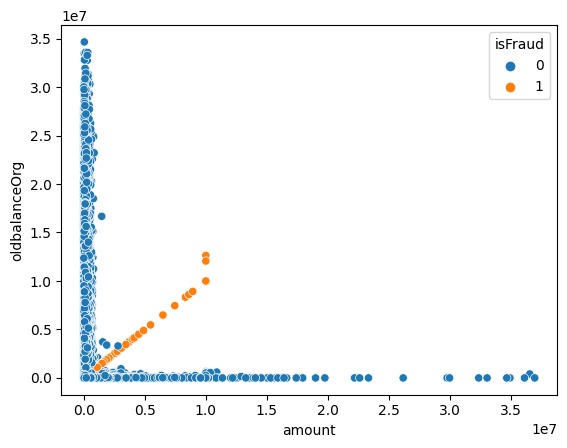

In [8]:
sns.scatterplot(x=df_train_kmeans['amount'], y=df_train_kmeans['oldbalanceOrg'], hue=df_train_kmeans['isFraud'])
plt.show()